## 使用梯度上升法求解主成分

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = np.empty((100,2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0., 10., size=100)

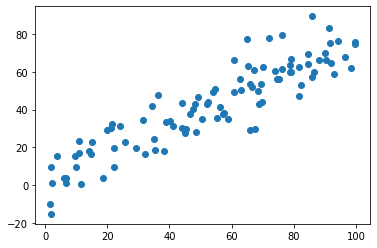

In [3]:
plt.scatter(X[:,0], X[:,1])

In [4]:
X[:,1].mean()

41.971274144826424

In [5]:
len(X)

100

### demean

In [6]:
def demean(X):
    return X - np.mean(X, axis=0)

In [7]:
X_demean = demean(X)

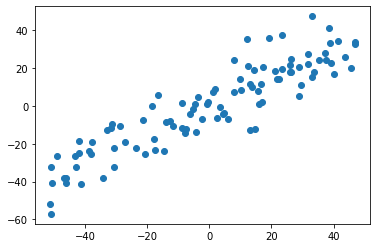

In [8]:
plt.scatter(X_demean[:,0], X_demean[:,1])

In [9]:
np.mean(X_demean[:,0])  #第0行均值已归零

8.384404281969182e-15

In [10]:
np.mean(X_demean[:,1])  #第1行均值已归零

7.389644451905042e-15

### 梯度上升法

In [11]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

In [12]:
def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

In [13]:
def df_debug(w, X, epsilon=1e-10):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2. * epsilon)
    
    return res
    

In [14]:
np.array([1,2,3]) + 2

array([3, 4, 5])

In [15]:
def direction(w):
    return w / np.linalg.norm(w)

def gradient_ascent(df, X, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    cur_iter = 0 
    w = direction(initial_w)
    
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)   # 注意：每次都要求一个单位方向，因此需要用w除以它的模
        if (abs(f(w, X) - f(last_w, X)) < epsilon):
            break
            
        cur_iter += 1
            
    return w

In [16]:
initial_w = np.random.random(X.shape[1])     # 注意：初始化的w值不能为0

In [17]:
initial_w

array([0.97271335, 0.21439046])

In [18]:
eta = 0.001

In [19]:
# 注意： 不能使用StandardScaler标准化数据
gradient_ascent(df_debug, X_demean, initial_w, eta)

array([0.78672281, 0.61730642])

In [20]:
w = gradient_ascent(df_math, X_demean, initial_w, eta)

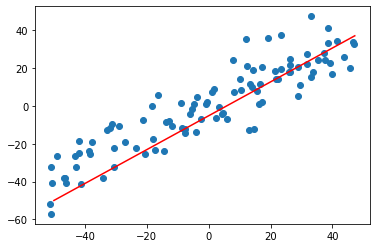

In [21]:
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.plot([-50, w[0]*60], [-50,w[1]*60], color='r')    # 理想的轴，即所有样本投射到这个轴上时的映射点方差最大，
# 由于是第一个求出来的主成分，因此也称之为 第一主成分

In [22]:
X_demean.shape

(100, 2)

## 随机梯度上升法

In [78]:
def f_2(w, X_i):
    return np.sum((X_i.dot(w)**2)) / len(X_i)

In [80]:
def df_sga(w, X_i):
    return (X_i.T.dot(X_i.dot(w))) * 2. 

In [25]:
def direction_2(w):
    return w / np.linalg.norm(w)

In [95]:
def sga(df, X, initial_w, n_iters=5, t0=5, t1=50):

    def learning_rate(t):
        return t0 / (t + t1)
    
    w = direction_2(initial_w)
    cur_iter = 0
    m = len(X)
    
    for  cur_iter in range(n_iters):
        
        indexes = np.random.permutation(np.arange(m))
        X_new = X[indexes]
        
        for i in range(m):
            gradient = df_sga(w, X_new[i])
            w = w + learning_rate((cur_iter * m +i)) * gradient
            w = direction_2(w)
        
    return w

In [27]:
initial_w = np.random.random(X.shape[1])

In [125]:
sga(df_sga, X, initial_w, n_iters=1000)

array([0.77173426, 0.63594515])

In [47]:
gradient_ascent(df_math, X_demean, initial_w, eta)

array([0.78672201, 0.61730744])

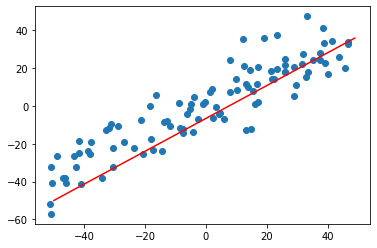

In [121]:
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.plot([-50, sga(df_sga, X, initial_w, n_iters=1000)[0]*60], [-50,sga(df_sga, X, initial_w, n_iters=100)[1]*60],
         color='r') 

array([44.05568621, 43.4078821 ])

## 小批量梯度上升法